# Przygotowanie danych

In [1]:
import pandas as pd
import os

#### Przykładowe pliki - struktura

In [2]:
df_m = pd.read_csv('data/dane_piec/2021-04-19/manipulowane_2021-04-19 00.csv')
df_m.head(3)

,Czas,001FCx00285_SPPV.PV,001XXXCALC01.NUM.PV[3],001SCx00274_SPPV.PV,001FCx00241_sppv.pv,Unnamed: 5
0,2021-04-19 0:00:00,2700,81.0,50.0,31.0,NaN
1,2021-04-19 0:00:01,2700,81.0,50.0,31.0,NaN
2,2021-04-19 0:00:02,2700,81.0,50.0,31.0,NaN


In [3]:
df_s = pd.read_csv('data/dane_piec/2021-04-19/straty_2021-04-19 00.csv')
df_s.head(3)

,czas,001NIR0SZR0.daca.pv,001NIR0SZRG.daca.pv,001NIR0S600.daca.pv,001NIR0S500.daca.pv,001NIR0S300.daca.pv,001NIR0S100.daca.pv
0,2021-04-19 0:00:00,23.298206,0.870960,1.513844,7.206612,7.292219,6.445967
1,2021-04-19 0:00:01,23.303154,0.870934,1.513818,7.207745,7.292501,6.446149
2,2021-04-19 0:00:02,23.308102,0.870908,1.513792,7.208877,7.293985,6.446331


In [4]:
df_zj = pd.read_csv('data/dane_piec/2021-04-19/zaklocajace_2021-04-19 00.csv')
df_zj.head(3)

,Czas,001FYx00206_SPSUM.pv,001FCx00231_SPPV.PV,001FCx00251_SPPV.PV,001FCx00281.PV,001FCx00262.PV,001FCx00261.PV,001XXXCALC01.NUM.PV[2],prob_corg,prob_s,sita_nadziarno,sita_podziarno,poziom_zuzel
0,2021-04-19 0:00:00,114.0,10.0,3,350.000000,31570.68359,9822.601563,303.0,8.61,11.27,2.10,62.000000,1250
1,2021-04-19 0:00:01,114.0,10.0,3,350.010620,31577.13672,9820.554688,303.0,8.61,11.27,2.34,62.799999,1360
2,2021-04-19 0:00:02,114.0,10.0,3,349.990967,31583.59375,9818.508789,303.0,8.61,11.27,2.34,62.799999,1360


In [5]:
df_za = pd.read_csv('data/dane_piec/2021-04-19/zaklocane_2021-04-19 00.csv')
df_za.head(3)

,Czas,001UCx00274.pv,001NIR0ODS0.daca.pv,temp_zuz,007SxR00555.daca1.pv,Unnamed: 5
0,2021-04-19 0:00:00,13.727884,9.327152,1306,-0.128922,NaN
1,2021-04-19 0:00:01,13.726639,9.329683,1305,-0.328362,NaN
2,2021-04-19 0:00:02,13.725391,9.332214,1305,-0.113587,NaN


#### Wczytanie wszystkich plików jednego rodzaju do jednego df

In [6]:
df_manipulowalne = pd.DataFrame(columns=df_m.columns)
df_straty = pd.DataFrame(columns=df_s.columns)
df_zaklocajace = pd.DataFrame(columns=df_zj.columns)
df_zaklocane = pd.DataFrame(columns=df_m.columns)

for dte_folder in ['2021-04-19', '2021-05-08', '2021-05-27']:
    print(f'Zaczynam przetwarzać folder: {dte_folder}')
    files_manipulowane = [filename for filename in os.listdir('data/dane_piec/' + dte_folder + '/') if filename.startswith("manipulowane")]
    files_straty = [filename for filename in os.listdir('data/dane_piec/' + dte_folder + '/') if filename.startswith("straty")]
    files_zaklocajace = [filename for filename in os.listdir('data/dane_piec/' + dte_folder + '/') if filename.startswith("zaklocajace")]
    files_zaklocane = [filename for filename in os.listdir('data/dane_piec/' + dte_folder + '/') if filename.startswith("zaklocane")]    
    
    for file_name in files_manipulowane:
        df_tmp = pd.read_csv('data/dane_piec/' + dte_folder + '/' + file_name)
        df_manipulowalne = pd.concat([df_manipulowalne.reset_index(drop=True), df_tmp.reset_index(drop=True)], axis=0)
        
    for file_name in files_straty:
        df_tmp = pd.read_csv('data/dane_piec/' + dte_folder + '/' + file_name)
        df_straty = pd.concat([df_straty.reset_index(drop=True), df_tmp.reset_index(drop=True)], axis=0)
        
    for file_name in files_zaklocajace:
        df_tmp = pd.read_csv('data/dane_piec/' + dte_folder + '/' + file_name)
        df_zaklocajace = pd.concat([df_zaklocajace.reset_index(drop=True), df_tmp.reset_index(drop=True)], axis=0)
        
    for file_name in files_zaklocane:
        df_tmp = pd.read_csv('data/dane_piec/' + dte_folder + '/' + file_name)
        df_zaklocane = pd.concat([df_zaklocane.reset_index(drop=True), df_tmp.reset_index(drop=True)], axis=0)

Zaczynam przetwarzać folder: 2021-04-19
Zaczynam przetwarzać folder: 2021-05-08
Zaczynam przetwarzać folder: 2021-05-27


#### Połączenie danych

In [7]:
df_manipulowalne.columns = list(df_manipulowalne.columns.str.lower())
df_straty.columns = list(df_straty.columns.str.lower())
df_zaklocajace.columns = list(df_zaklocajace.columns.str.lower())
df_zaklocane.columns = list(df_zaklocane.columns.str.lower())

In [8]:
df_manipulowalne = df_manipulowalne.drop(['unnamed: 5'], axis=1)
df_zaklocane = df_zaklocane.drop(['001fcx00285_sppv.pv', '001xxxcalc01.num.pv[3]','001scx00274_sppv.pv', '001fcx00241_sppv.pv', 'unnamed: 5',], axis=1)

In [9]:
print(f'df_manipulowalne: {df_manipulowalne.shape}')
print(f'df_straty: {df_straty.shape}')
print(f'df_zaklocajace: {df_zaklocajace.shape}')
print(f'df_zaklocane: {df_zaklocane.shape}')

df_manipulowalne: (3340800, 5)
df_straty: (3340800, 7)
df_zaklocajace: (3340800, 13)
df_zaklocane: (3340800, 5)


In [10]:
df_raw = pd.merge(pd.merge(df_manipulowalne, df_straty, how="inner", on=["czas"]), 
              pd.merge(df_zaklocajace, df_zaklocane, how="inner", on=["czas"]), 
              how="inner", on=["czas"])

print(f'połączony df: {df_raw.shape}')
df_raw.sample(3)

połączony df: (3954000, 27)


,czas,001fcx00285_sppv.pv,001xxxcalc01.num.pv[3],001scx00274_sppv.pv,001fcx00241_sppv.pv,001nir0szr0.daca.pv,001nir0szrg.daca.pv,001nir0s600.daca.pv,001nir0s500.daca.pv,001nir0s300.daca.pv,...,001xxxcalc01.num.pv[2],prob_corg,prob_s,sita_nadziarno,sita_podziarno,poziom_zuzel,001ucx00274.pv,001nir0ods0.daca.pv,temp_zuz,007sxr00555.daca1.pv
997153,2021-05-08 12:59:13,2700.0,79.0,40.0,27.0,16.974552,0.734702,1.362955,3.490257,5.362500,...,298.0,8.48,11.20,2.34,59.599998,1080,16.297848,10.553820,1301.0,0.492400
1726230,2021-05-16 23:30:30,2700.0,72.0,50.0,29.0,21.275684,1.102274,2.021093,5.808215,6.286809,...,304.0,8.37,11.25,3.48,62.599998,1260,12.982796,10.074728,1307.0,-1.233500
3272974,2021-05-30 1:39:34,2800,72.0,40.0,21.0,22.300625,1.005590,1.823938,6.418890,6.769264,...,284.0,8.63,10.28,3.14,63.200001,1440,15.110643,9.891186,1307.0,-0.665879


#### Nazewnictwo biznesowe

In [11]:
df_clean = df_raw.copy()

In [12]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
001xxxcalc01.num.pv[3],3954000.0,74.308119,3.563982,60.041664,72.000000,72.000000,78.000000,81.000000
001scx00274_sppv.pv,3954000.0,47.991845,4.896764,40.000000,44.000000,48.000000,50.000000,70.000000
001fcx00241_sppv.pv,3954000.0,25.611789,4.156419,5.000000,23.000000,27.000000,28.000000,34.000000
001nir0szr0.daca.pv,3954000.0,21.443493,2.626025,7.339664,19.877235,21.887913,23.288977,27.496664
001nir0szrg.daca.pv,3954000.0,0.952328,0.122225,0.414000,0.865949,0.944641,1.049613,1.289821
001nir0s600.daca.pv,3954000.0,1.729754,0.245494,0.749979,1.567550,1.713233,1.923640,2.453070
001nir0s500.daca.pv,3954000.0,5.970218,1.305927,1.626060,5.158939,6.102010,6.851011,9.815113
001nir0s300.daca.pv,3954000.0,6.550859,0.851777,1.884686,6.045718,6.657787,7.135733,8.770498
001nir0s100.daca.pv,3954000.0,6.240509,0.437699,2.639983,5.995114,6.260634,6.482364,8.387413
001fyx00206_spsum.pv,3954000.0,110.123475,9.283504,52.000000,110.000000,112.000000,114.000000,122.000000


In [13]:
df_clean = df_clean.sort_values(by='czas').reset_index(drop=True).reset_index()

In [14]:
df_clean = df_clean.rename(columns={"001fcx00285_sppv.pv": "manip_przeplywPowietrza", 
                        "001xxxcalc01.num.pv[3]": "manip_stezenieTlenu",
                        "001scx00274_sppv.pv": "manip_predkoscDmuchu",
                        "001fcx00241_sppv.pv": "manip_pylyProcesowe",
                        "001nir0szr0.daca.pv": "straty_laczne",
                        "001nir0szrg.daca.pv": "straty_pasG",
                        "001nir0s600.daca.pv": "straty_pierscien600",
                        "001nir0s500.daca.pv": "straty_pierscien500",
                        "001nir0s300.daca.pv": "straty_pierscien300",
                        "001nir0s100.daca.pv": "straty_pierscien100",
                        "001fyx00206_spsum.pv": "zaklucaj_mieszankaKonc",
                        "001fcx00231_sppv.pv": "zaklucaj_prazonka",
                        "001fcx00251_sppv.pv": "zaklucaj_zuzelPB",
                        "001fcx00281.pv": "zaklucaj_tlenDoLancy",
                        "001fcx00262.pv": "zaklucaj_tlenDoDmuchu",
                        "001fcx00261.pv": "zaklucaj_powietrzeDoDmuchu",
                        "001xxxcalc01.num.pv[2]": "zaklucaj_przetlenienie",
                        "prob_corg": "zaklucaj_mieszankaWegla",
                        "prob_s": "zaklucaj_mieszankaSiarki",
                        "sita_nadziarno": "zaklucaj_mieszankaNadziarno",
                        "sita_podziarno": "zaklucaj_mieszankaPodziarno",
                        "poziom_zuzel": "zaklucaj_poziomTopu",
                        "001ucx00274.pv": "zaklucane_kadDystrybucji",
                        "001nir0ods0.daca.pv": "zaklucane_stratyLaczneOdstojnik",
                        "temp_zuz": "zaklucane_tempZuzla",
                        "007sxr00555.daca1.pv": "zaklucane_drganiaKO",
                        "index": "timeID"
                      }
             )

In [15]:
df_clean.head(5)

,timeID,czas,manip_przeplywPowietrza,manip_stezenieTlenu,manip_predkoscDmuchu,manip_pylyProcesowe,straty_laczne,straty_pasG,straty_pierscien600,straty_pierscien500,...,zaklucaj_przetlenienie,zaklucaj_mieszankaWegla,zaklucaj_mieszankaSiarki,zaklucaj_mieszankaNadziarno,zaklucaj_mieszankaPodziarno,zaklucaj_poziomTopu,zaklucane_kadDystrybucji,zaklucane_stratyLaczneOdstojnik,zaklucane_tempZuzla,zaklucane_drganiaKO
0,0,2021-04-19 0:00:00,2700,81.0,50.0,31.0,23.298206,0.870960,1.513844,7.206612,...,303.0,8.61,11.27,2.10,62.000000,1250,13.727884,9.327152,1306.0,-0.128922
1,1,2021-04-19 0:00:01,2700,81.0,50.0,31.0,23.303154,0.870934,1.513818,7.207745,...,303.0,8.61,11.27,2.34,62.799999,1360,13.726639,9.329683,1305.0,-0.328362
2,2,2021-04-19 0:00:02,2700,81.0,50.0,31.0,23.308102,0.870908,1.513792,7.208877,...,303.0,8.61,11.27,2.34,62.799999,1360,13.725391,9.332214,1305.0,-0.113587
3,3,2021-04-19 0:00:03,2700,81.0,50.0,31.0,23.313053,0.870881,1.513766,7.210010,...,303.0,8.61,11.27,2.34,62.799999,1360,13.724146,9.334154,1305.0,0.101188
4,4,2021-04-19 0:00:04,2700,81.0,50.0,31.0,23.318001,0.870855,1.513740,7.211143,...,303.0,8.61,11.27,2.34,62.799999,1360,13.722900,9.335503,1305.0,-0.098252


In [16]:
df_clean.to_csv('zadanie2_gzip.csv', sep="|", index=False)

In [17]:
df_clean.to_csv('zadanie2_gzip.csv', sep="|", index=False, compression="gzip")

#### Jakieś rysuneczki

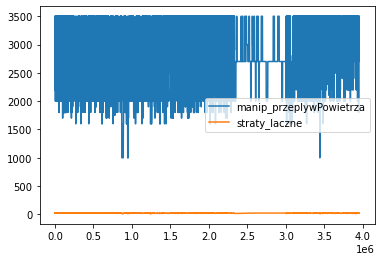

In [18]:
df_clean[['manip_przeplywPowietrza','straty_laczne']].plot();

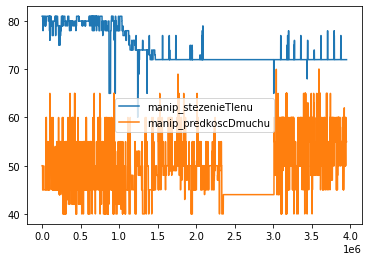

In [19]:
df_clean[['manip_stezenieTlenu','manip_predkoscDmuchu']].plot();

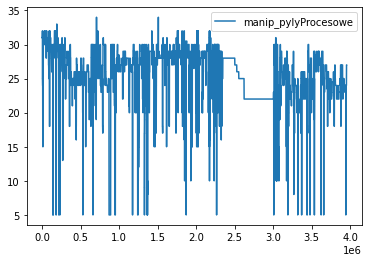

In [20]:
df_clean[['manip_pylyProcesowe']].plot();

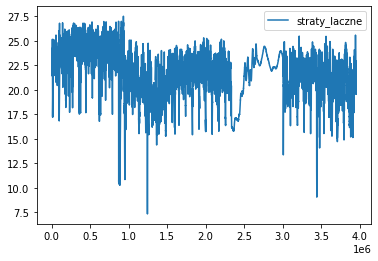

In [21]:
df_clean[['straty_laczne']].plot();

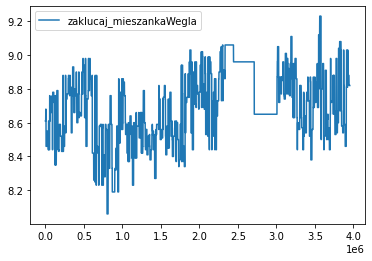

In [23]:
df_clean[['zaklucaj_mieszankaWegla']].plot();

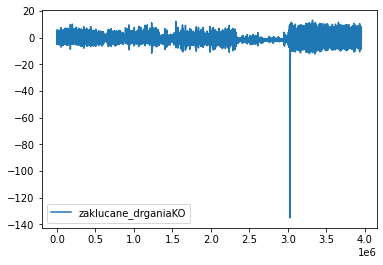

In [24]:
df_clean[['zaklucane_drganiaKO']].plot(); 